<img src = "https://cses.ucsd.edu/assets/images/cseslogo-300.png"> </center>
<br>
<center> <h1> CSES Workshop - Introduction to Data Science and Machine Learning</h1>
<br> by Arkin Gupta (http://www.arkin.xyz)

<h2> Prerequisites: </h2>
Anaconda Navigator <br>
pandas, numpy, sklearn, matplotlib

<h2> Goals: </h2>
1) Data cleaning & exploration <br>
2) Hypothesis testing <br>
3) Model development <br>


<h2> Data set </h2>
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [298]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

 <center> <h2> So lets get started </h2> </center>
<img src = "https://d33v4339jhl8k0.cloudfront.net/docs/assets/575aef5a9033606599d1cbfd/images/5a0b34490428633199247403/file-ySylmX2CuM.gif">

In [299]:
#Read CSV
df = pd.read_csv('UCI_Credit_Card.csv')
print('Rows, cols', df.shape)
df.head()

Rows, cols (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [300]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [301]:
#Check null values
df.isnull().values.any()

False

In [302]:
for col in df.columns:
    print(col, df[col].value_counts(), '\n')

ID 2047     1
1322     1
15629    1
9486     1
11535    1
21792    1
23841    1
17698    1
19747    1
29988    1
25894    1
27943    1
5416     1
7465     1
3371     1
3403     1
13612    1
15661    1
9518     1
11567    1
21824    1
23873    1
17730    1
19779    1
25926    1
27975    1
5448     1
7497     1
13580    1
3339     1
        ..
2740     1
15026    1
629      1
8881     1
6774     1
4727     1
27256    1
25209    1
29307    1
19068    1
17021    1
23166    1
21119    1
10896    1
8849     1
14994    1
12947    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
29339    1
19100    1
17053    1
23198    1
21151    1
10928    1
2049     1
Name: ID, Length: 30000, dtype: int64 

LIMIT_BAL 50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
150000.0     1110
100000.0     1048
180000.0      995
360000.0      881
60000.0       825
140000.0      749
230000.0      737
70000.0       731
210000.0      730
130000.0      729
120000

In [305]:
print('Before cleaning', df['EDUCATION'].value_counts())
df.loc[((df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)), 'EDUCATION'] = 4
print('After cleaning', df['EDUCATION'].value_counts())

Before cleaning 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
After cleaning 2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


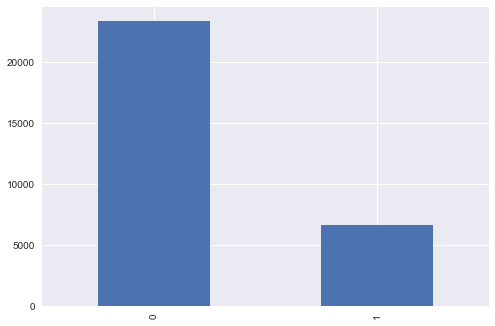

In [306]:
df['default.payment.next.month'].value_counts().plot('bar')
plt.show()

<h2> Hypothesis testing </h2>

### 1) Does credit limit affect payment default?

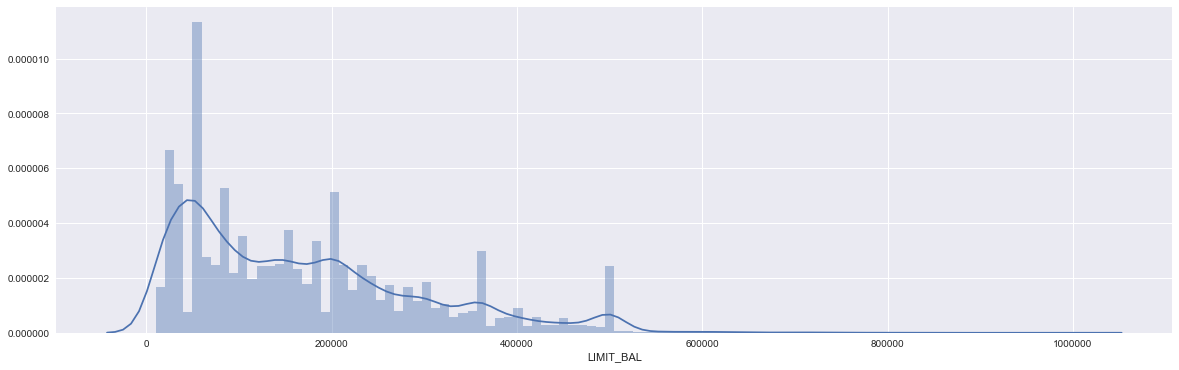

In [307]:
plt.figure(figsize = (20,6))
sns.distplot(df['LIMIT_BAL'], kde=True,bins=100)
plt.show()

In [308]:
defaulted = df[df['default.payment.next.month'] ==1]
not_defaulted = df[df['default.payment.next.month'] ==0]

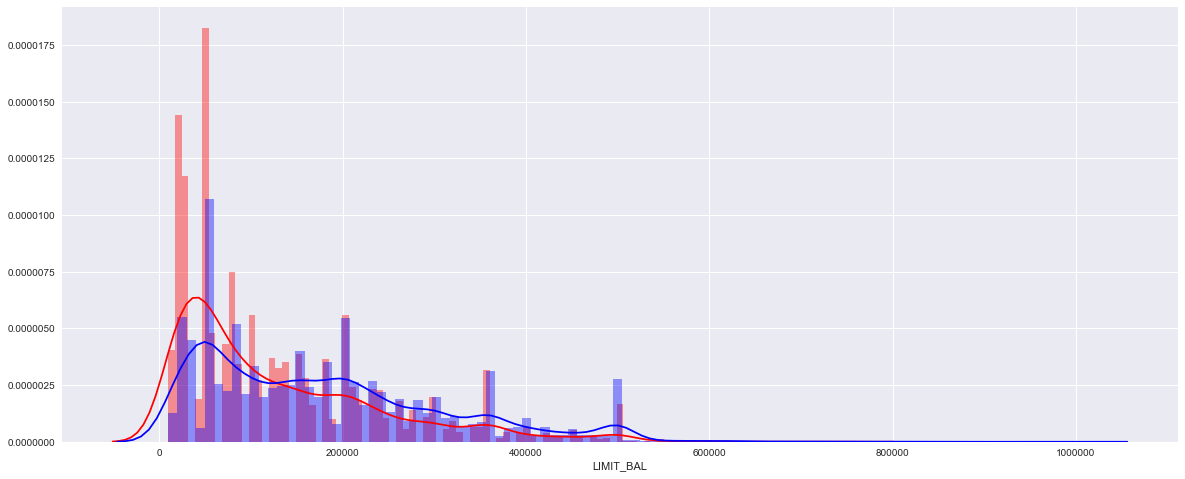

In [309]:
plt.figure(figsize = (20,8))

sns.distplot(defaulted['LIMIT_BAL'], kde=True,bins=100, color = "red")
sns.distplot(not_defaulted['LIMIT_BAL'], kde=True,bins=100, color = "blue")
plt.show()

In [310]:
from scipy.stats import ttest_ind
ttest_ind(defaulted['LIMIT_BAL'], not_defaulted['LIMIT_BAL'])

Ttest_indResult(statistic=-26.908521684796522, pvalue=1.3022439532597397e-157)

In [311]:
from scipy.stats import ks_2samp
ks_2samp(defaulted['LIMIT_BAL'], not_defaulted['LIMIT_BAL'])

Ks_2sampResult(statistic=0.18185579706712507, pvalue=2.1957609521425392e-149)

### 2) Does education affect payment default?

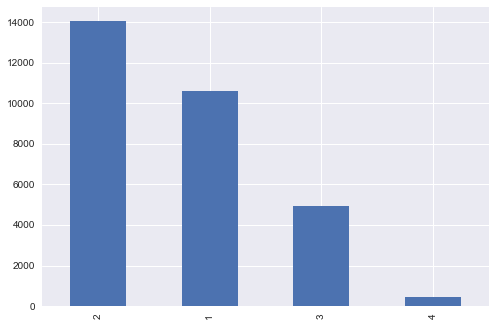

In [312]:
#Let's plot education value counts
df['EDUCATION'].value_counts().plot('bar')
plt.show()

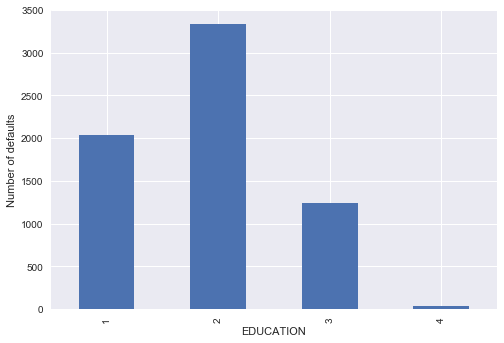

In [313]:
fig = df.groupby('EDUCATION')['default.payment.next.month'].sum().plot('bar')
fig.set_ylabel('Number of defaults')
plt.show()

In [314]:
education = df.groupby(['EDUCATION', 'default.payment.next.month']).size().unstack(1)

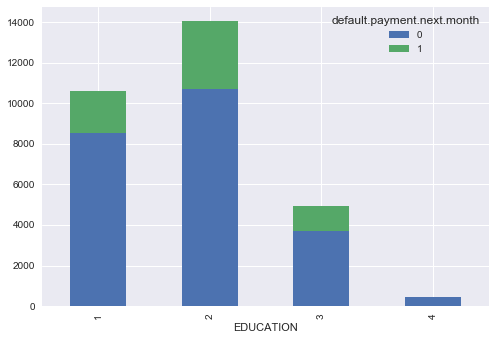

In [315]:
education.plot(kind = 'bar', stacked = True)
plt.show()

### 3) Does gender effect next month payment default

In [316]:
gender = df.groupby(['SEX', 'default.payment.next.month']).size().unstack(1)
gender

default.payment.next.month,0,1
SEX,,
1,9015,2873
2,14349,3763


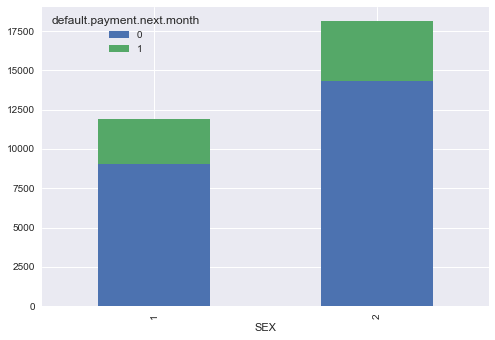

In [317]:
gender.plot(kind='bar', stacked = True)
plt.show()

In [318]:
gender['perc'] = gender[1] / (gender[1] + gender[0])
gender

default.payment.next.month,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


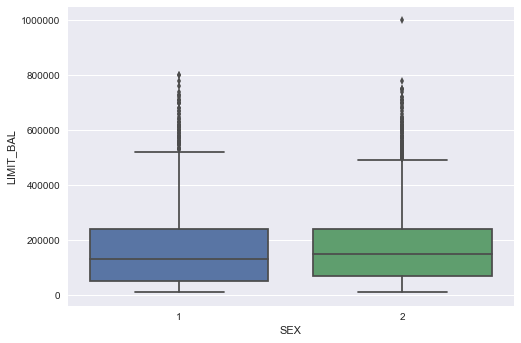

In [319]:
s = sns.boxplot(x='SEX', y='LIMIT_BAL',data=df)
plt.show();

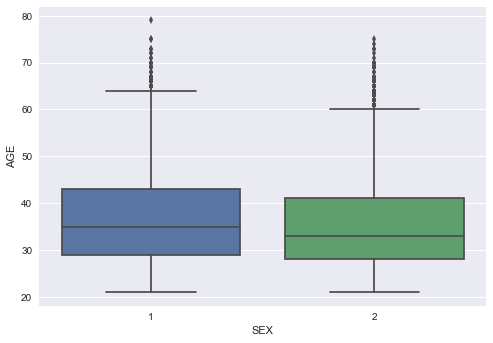

In [320]:
s = sns.boxplot(x='SEX', y='AGE', data=df)
plt.show();

### 3) Do previous month payments effect next month payment default?

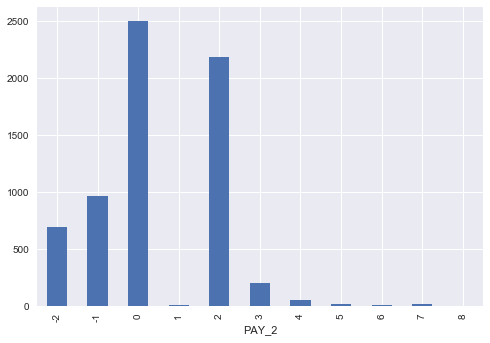

In [321]:
df.groupby('PAY_2')['default.payment.next.month'].sum().plot('bar')
plt.show()

### 4) How are balances and payment amounts correlated?

In [322]:
balance = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [323]:
balance

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
5,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0
6,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0
7,11876.0,380.0,601.0,221.0,-159.0,567.0
8,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0
9,0.0,0.0,0.0,0.0,13007.0,13912.0


In [324]:
corr= balance.corr()
corr

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
BILL_AMT1,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650
BILL_AMT2,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594
BILL_AMT3,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320
BILL_AMT4,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941
BILL_AMT5,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197
BILL_AMT6,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000


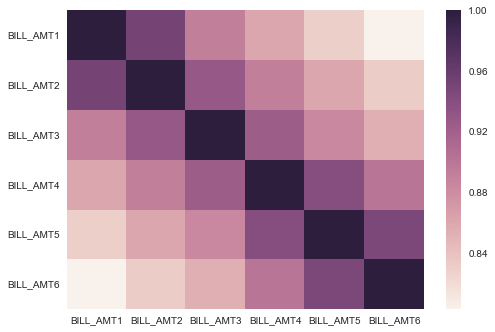

In [325]:
sns.heatmap(corr)
plt.show()

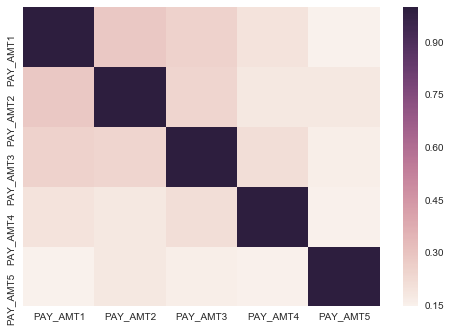

In [326]:
amt_paid = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']]
corr= amt_paid.corr()
sns.heatmap(corr)
plt.show()

<h2> Model Development </h2>


In [247]:
target = 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [288]:
train_df, test_df = train_test_split(df, test_size=10000, shuffle=True )

### Logistic Regression

<img src = "http://www.saedsayad.com/images/LogReg_1.png">

In [270]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_df[predictors], train_df[target])

In [271]:
clf.fit(train_df[predictors], train_df[target].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [272]:
predictions = clf.predict(test_df[predictors])

In [273]:
accuracy = sum(predictions == test_df[target])/len(test_df[target])

In [274]:
accuracy

0.77700000000000002

In [278]:
target = 'default.payment.next.month'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_4', 'PAY_6', 
                'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT5','PAY_AMT1', 'PAY_AMT3', 'PAY_AMT5']

In [279]:
train_df, test_df = train_test_split(df, test_size=10000, shuffle=True )

In [280]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_df[predictors], train_df[target])
clf.fit(train_df[predictors], train_df[target].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [282]:
predictions = clf.predict(test_df[predictors])
accuracy = sum(predictions == test_df[target])/len(test_df[target])

In [283]:
accuracy

0.77910000000000001

<img src="https://www.caxy.com/sites/default/files/inline-images/DBe9grC.gif">

<H2> Decision Trees </h2>
<img src="https://cdn-images-1.medium.com/max/1200/0*Yclq0kqMAwCQcIV_.jpg">

In [265]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [266]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=2018, verbose=False,
            warm_start=False)

In [267]:
predictions = clf.predict(test_df[predictors])

In [268]:
accuracy = sum(predictions == test_df[target])/len(test_df[target])

In [269]:
accuracy

0.81499999999999995

<center><img src="http://media3.giphy.com/media/jYAGkoghdmD9S/giphy.gif">

<h2><b>That's all folks - Enjoy SDHacks!</b></h2><br>
</center>